In [1]:
#Calling Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataLake = pd.read_csv('data_lake.csv')

/tmp/ipykernel_6008/3600154685.py:1: DtypeWarning: Columns (3,4,6,7,8,9,10,11,15,16,17,18,21,22,24,25,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dataLake = pd.read_csv('data_lake.csv')


#### Uncleaned csv file

In [3]:
dataLake.head(20)

,Unnamed: 0.1,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,...,no_of_reviews,ratings,author,cover_type,year,genre,date,product,market,size
0,0,0.0,90420332.0,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,368814.0,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,9333523.0,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,80155205.0,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,30180504.0,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5.0,10122647.0,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6.0,70404875.0,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7.0,60155602.0,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8.0,50406465.0,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9.0,69304221.0,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Separating the IKEA records

In [4]:
ikea = dataLake[['Unnamed: 0.1','item_id','name','category','price','link','designer','depth','height','width','short_description',]]
ikea = ikea[ikea['item_id'].notna()].replace(np.nan,1).rename(columns={"Unnamed: 0.1": "record_number","name": "product_name","item_id": "item_number"}).set_index('record_number').sort_values('record_number')
ikea['item_number'] = ikea['item_number'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)
ikea[['product_name','category','link','designer','short_description']] = ikea[['product_name','category','link','designer','short_description']].astype(str)
ikea[['price','depth','height','width']] = ikea[['price','depth','height','width']].astype(int)
ikea.head(20)

,item_number,product_name,category,price,link,designer,depth,height,width,short_description
record_number,,,,,,,,,,
0,90420332,FREKVENS,Bar furniture,265,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,Nicholai Wiig Hansen,1,99,51,"Bar table, in/outdoor, 51x51 cm"
1,368814,NORDVIKEN,Bar furniture,995,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,Francis Cayouette,1,105,80,"Bar table, 140x80 cm"
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095,https://www.ikea.com/sa/en/p/nordviken-nordvik...,Francis Cayouette,1,1,1,Bar table and 4 bar stools
3,80155205,STIG,Bar furniture,69,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Henrik Preutz,50,100,60,"Bar stool with backrest, 74 cm"
4,30180504,NORBERG,Bar furniture,225,https://www.ikea.com/sa/en/p/norberg-wall-moun...,Marcus Arvonen,60,43,74,"Wall-mounted drop-leaf table, ..."
5,10122647,INGOLF,Bar furniture,345,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,Carina Bengs,45,91,40,"Bar stool with backrest, 63 cm"
6,70404875,FRANKLIN,Bar furniture,129,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,K Hagberg/M Hagberg,44,95,50,"Bar stool with backrest, foldable, ..."
7,60155602,DALFRED,Bar furniture,195,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,Sarah Fager,50,1,50,"Bar stool, 63-74 cm"
8,50406465,FRANKLIN,Bar furniture,129,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,K Hagberg/M Hagberg,44,95,50,"Bar stool with backrest, foldable, ..."


In [5]:
print('Number of unique Designers: ',ikea['designer'].nunique())

Number of unique Designers:  381


In [6]:
print('Most expensive product(s): ')
high_furn = ikea[ikea['price'] == ikea['price'].max()]
high_furn

Most expensive product(s): 


,item_number,product_name,category,price,link,designer,depth,height,width,short_description
record_number,,,,,,,,,,
190,29277639,LIDHULT,Beds,9585,https://www.ikea.com/sa/en/p/lidhult-corner-so...,Henrik Preutz/IKEA of Sweden,164,102,387,"Corner sofa-bed, 6-seat"
2344,79277632,LIDHULT,Sofas & armchairs,9585,https://www.ikea.com/sa/en/p/lidhult-corner-so...,Henrik Preutz/IKEA of Sweden,164,102,387,"Corner sofa-bed, 6-seat"


In [7]:
print('Cheapest product(s): ')
low_furn = ikea[ikea['price'] == ikea['price'].min()]
low_furn

Cheapest product(s): 


,item_number,product_name,category,price,link,designer,depth,height,width,short_description
record_number,,,,,,,,,,
389,80336433,GUBBARP,Bookcases & shelving units,3,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,H Preutz/A Fredriksson,27,1,1,"Knob, 21 mm"
879,80336433,GUBBARP,Cabinets & cupboards,3,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,H Preutz/A Fredriksson,27,1,1,"Knob, 21 mm"
3349,80336433,GUBBARP,TV & media furniture,3,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,H Preutz/A Fredriksson,27,1,1,"Knob, 21 mm"


#### Separating Store records

In [8]:
store = dataLake[['Unnamed: 0.1','date','product','market','size']]
store = store[store['date'].notna()].rename(columns={"Unnamed: 0.1": "sale_number",}).replace(np.nan,0).set_index('sale_number')
store['date'] = pd.to_datetime(store.date)
store[['product','market','size']] = store[['product','market','size']].astype(str)
store.head(15)

,date,product,market,size
sale_number,,,,
0,2019-01-02,Aleika High Grade Flour,Bars,kg
1,2019-01-02,Aleika High Grade Flour,Bayanzurkh,kg
2,2019-01-02,Aleika High Grade Flour,Bumbugur,kg
3,2019-01-02,Aleika High Grade Flour,Emart,kg
4,2019-01-02,Aleika High Grade Flour,Kharkhorin,kg
5,2019-01-02,Aleika High Grade Flour,Khuchit Shonkhor,kg
6,2019-01-02,Aleika High Grade Flour,Max/M Mart,kg
7,2019-01-02,Aleika High Grade Flour,Mercury/Ikh Nayad,kg
8,2019-01-02,Aleika High Grade Flour,Nomin,kg


#### Separating Pokemon Card Records

In [9]:
pokemon = dataLake[['Unnamed: 0.1','Pokemon','Card Type','Generation','Card Number','Price']]
pokemon = pokemon[pokemon['Pokemon'].notna()] \
    .rename(columns={"Unnamed: 0.1": "item_number","Pokemon": "pokemon_name","Card Type": "card_type","Card Number": "card_number","Generation": "generation","Price": "price"}).set_index('item_number')
pokemon[['pokemon_name','card_type','generation','card_number']] = pokemon[['pokemon_name','card_type','generation','card_number']].astype(str)
pokemon.head(20)

,pokemon_name,card_type,generation,card_number,price
item_number,,,,,
0,AMPHAROS,REVERSE HOLO,AQUAPOLIS,001 OF 147,2.95
1,AMPHAROS,STANDARD,AQUAPOLIS,001 OF 147,2.50
2,ARCANINE,REVERSE HOLO,AQUAPOLIS,002 OF 147,3.95
3,ARCANINE,STANDARD,AQUAPOLIS,002 OF 147,2.95
4,ARIADOS,REVERSE HOLO,AQUAPOLIS,003 OF 147,2.50
5,ARIADOS,STANDARD,AQUAPOLIS,003 OF 147,1.50
6,AZUMARILL,REVERSE HOLO,AQUAPOLIS,004 OF 147,2.95
7,AZUMARILL,STANDARD,AQUAPOLIS,004 OF 147,1.95
8,BELLOSSOM,REVERSE HOLO,AQUAPOLIS,005 OF 147,2.95


In [10]:
print("Most expensive card of each Generation")
high_gen = pokemon.groupby('generation')['price'].max()
print(high_gen)

print()

print("Cheapest card of each Generation")
low_gen = pokemon.groupby('generation')['price'].min()
print(low_gen)

Most expensive card of each Generation
generation
AQUAPOLIS                   119.99
ARCEUS                       11.95
B&W - BOUNDARIES CROSSED     48.99
B&W - DARK EXPLORERS         43.99
B&W - DRAGONS EXALTED        33.99
                             ...  
XY - PHANTOM FORCES          38.99
XY - PRIMAL CLASH            13.99
XY - ROARING SKIES           17.99
XY - SHINING LEGENDS         33.99
XY - STEAM SIEGE             13.99
Name: price, Length: 217, dtype: float64

Cheapest card of each Generation
generation
AQUAPOLIS                   0.20
ARCEUS                      0.10
B&W - BOUNDARIES CROSSED    0.29
B&W - DARK EXPLORERS        0.09
B&W - DRAGONS EXALTED       0.19
                            ... 
XY - PHANTOM FORCES         0.09
XY - PRIMAL CLASH           0.09
XY - ROARING SKIES          0.09
XY - SHINING LEGENDS        0.09
XY - STEAM SIEGE            0.09
Name: price, Length: 217, dtype: float64


#### Separating Book Records

In [11]:
books = dataLake[['Unnamed: 0.1','ranks','title','no_of_reviews','ratings','author','cover_type','year','genre']]
books = books[books['ranks'].notna()].rename(columns={"Unnamed: 0.1": "book_id"}).set_index('book_id')
books['ranks'] = books['ranks'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)
books['year'] = books['year'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)
books['no_of_reviews'] = books['no_of_reviews'].astype(str).apply(lambda x: x.replace(',','')).astype(int)
books['ratings'].astype(int)
books['genre'] = books['genre'].replace('unknown','Other')
books.tail(10)

,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
book_id,,,,,,,,
1281,91,The Step-by-Step Instant Pot Cookbook: 100 Sim...,30581,4.7,Jeffrey Eisner,Paperback,2021,Non Fiction
1282,92,The Vanishing Half: A Novel,96412,4.4,Brit Bennett,Hardcover,2021,Fiction
1283,93,A Promised Land,125017,4.9,Barack Obama,Hardcover,2021,Non Fiction
1284,94,What Should Danny Do? (The Power to Choose Ser...,22169,4.8,Adir Levy,Hardcover,2021,Fiction
1285,95,The Wish,35292,4.7,Nicholas Sparks,Hardcover,2021,Fiction
1286,96,Will,21401,4.8,Will Smith,Hardcover,2021,Non Fiction
1287,97,Think and Grow Rich: The Landmark Bestseller N...,79872,4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,98,Dragons Love Tacos,15753,4.8,Adam Rubin,Hardcover,2021,Fiction
1289,99,The Truth About COVID-19: Exposing The Great R...,7246,4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction


In [12]:
corr_review_rate = books['no_of_reviews'].corr(books['ratings'])
print("The correlation between the number of reviews and ratings is: ",corr_review_rate)

corr_rank_rate = books['ranks'].corr(books['ratings'])
print("The correlation between the book ranking and ratings is: ",corr_rank_rate )

The correlation between the number of reviews and ratings is:  0.1732787370123403
The correlation between the book ranking and ratings is:  -0.014559168438934475


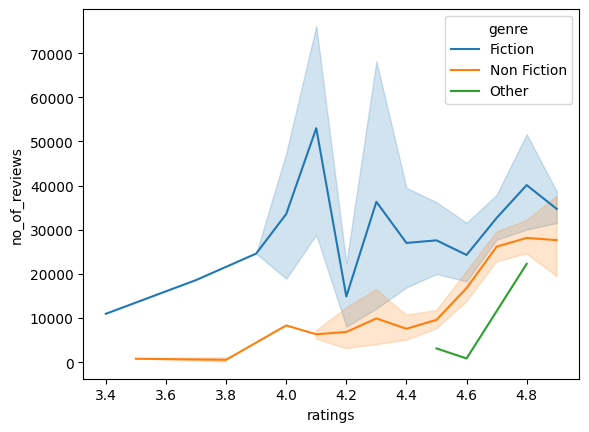

In [13]:
fig = sns.lineplot(
    data=books,
    x="ratings", y="no_of_reviews", hue="genre",
)